## Line broadening

In [1]:
#Libraries
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

#Configuration for the font and style in the graphics
params = {
        'font.family': 'serif',
        'font.serif': ['STIXGeneral', 'Times New Roman'],
        'font.size': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 18,
        'legend.fontsize': 16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'mathtext.fontset': 'stix',
        'text.usetex': False,
        'figure.figsize': (6.4, 4.8),
        'savefig.format': 'pdf',
        'savefig.bbox': 'tight'
    }
    
plt.rcParams.update(params)

In [2]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values VIS.xlsx")
NIR_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values NIR.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Spatially Resolved Atlas\Data\Values_SPA.xlsx")
ALL_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values ALL.xlsx")


### Core curvature vs Line Depth

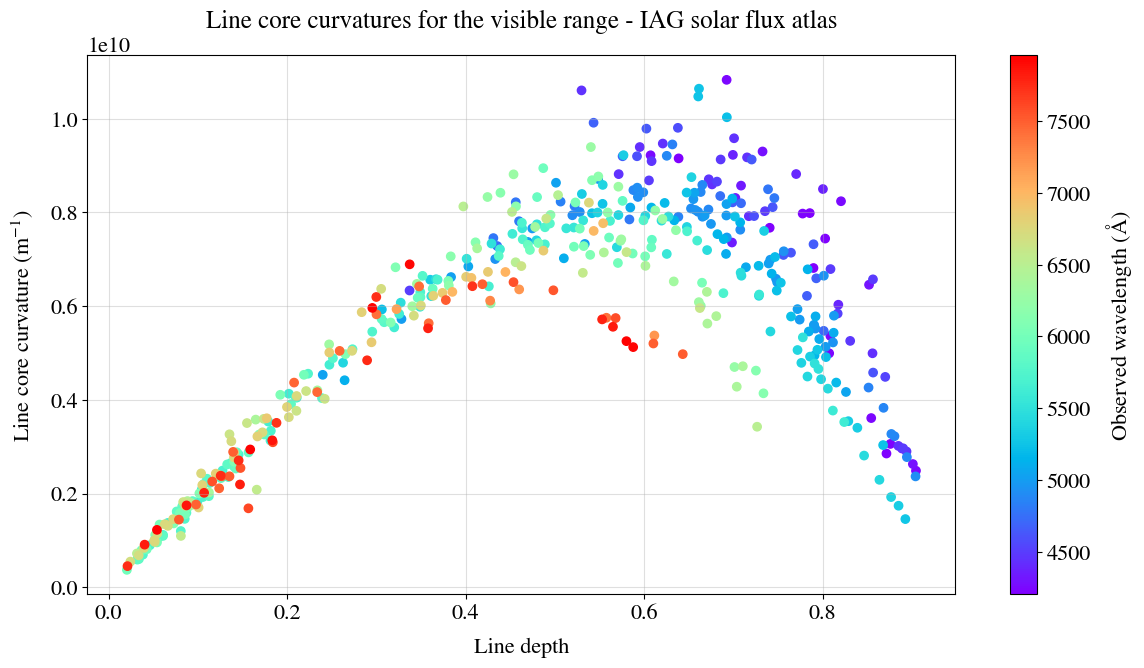

In [3]:
fig1, ax = plt.subplots(1,1,figsize=(14,7))

scatter = ax.scatter(VIS_data['Line Depth'],VIS_data['Core curvature'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)

ax.set_title('Line core curvatures for the visible range - IAG solar flux atlas', pad=20)
ax.set_xlabel(r'Line depth',labelpad=10)
ax.set_ylabel(r'Line core curvature $(\text{m}^{-1})$',labelpad=10)
ax.grid(alpha=0.4)

# fig1.savefig('Curvature_VIS')

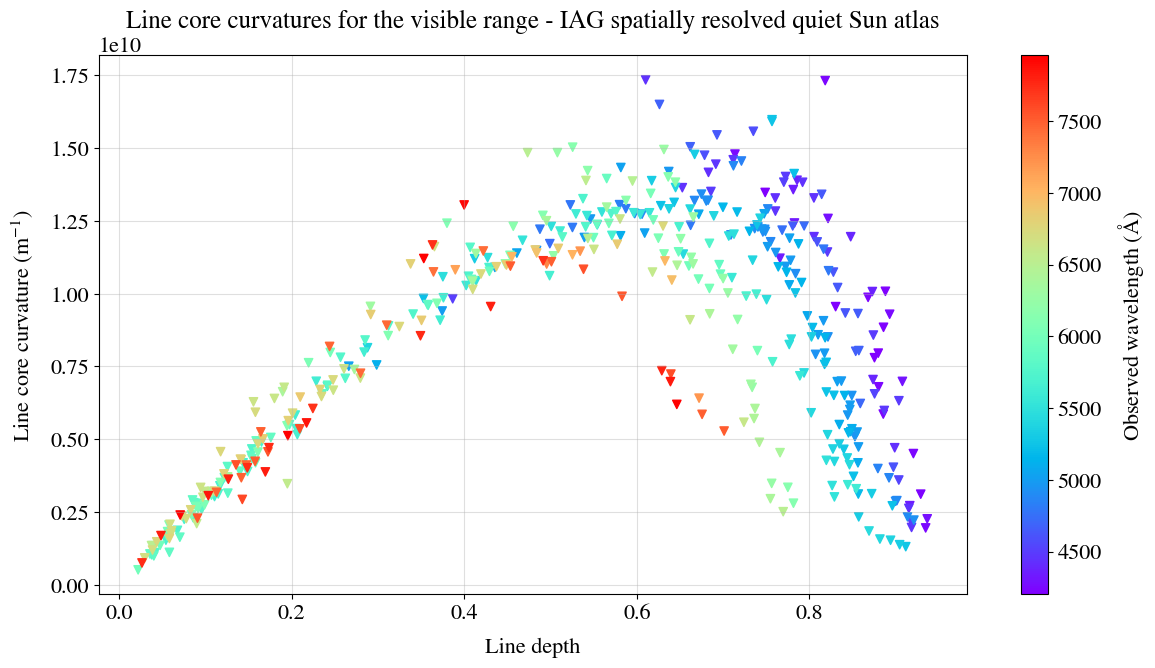

In [ ]:
fig3, ax = plt.subplots(1,1,figsize=(14,7))

scatter = ax.scatter(SPA_data['Line Depth'],SPA_data['Core curvature'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)

ax.set_title('Line core curvatures for the visible range - IAG spatially resolved quiet Sun atlas',pad=20)
ax.set_xlabel(r'Line depth',labelpad=10)
ax.set_ylabel(r'Line core curvature $(\text{m}^{-1})$',labelpad=10)
ax.grid(alpha=0.4)

# fig3.savefig('Curvature_SPA')

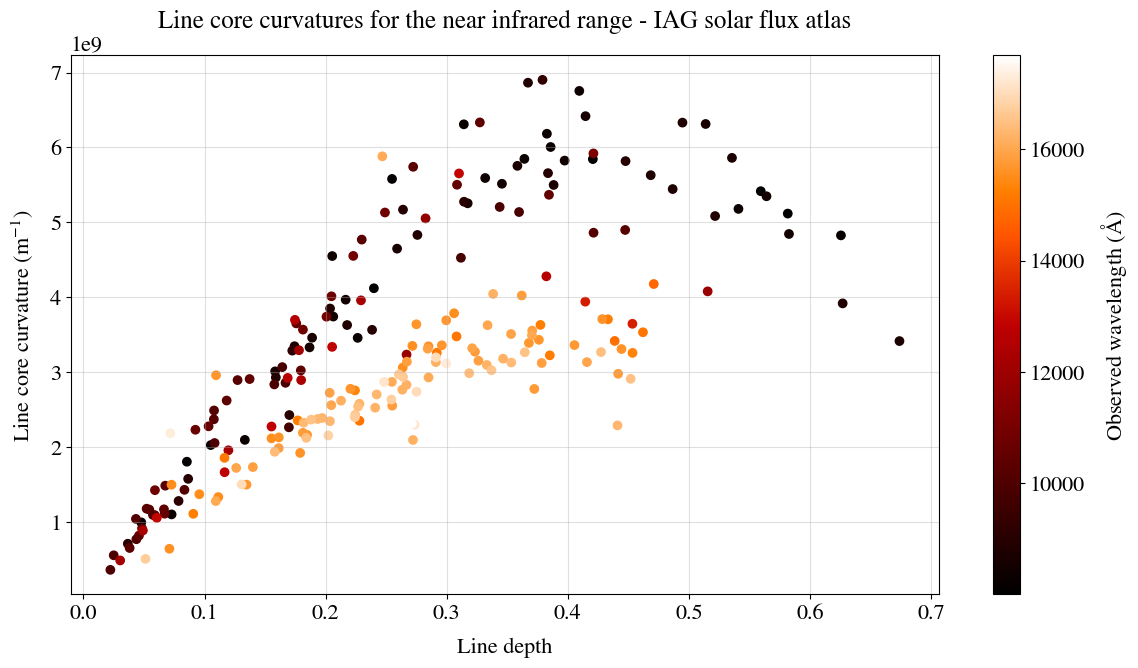

In [5]:
fig5, ax = plt.subplots(1,1,figsize=(14,7))

scatter = ax.scatter(NIR_data['Line Depth'],NIR_data['Core curvature'],c=NIR_data["Observed wavelength"],cmap='gist_heat',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)

ax.set_title('Line core curvatures for the near infrared range - IAG solar flux atlas', pad=20)
ax.set_xlabel(r'Line depth',labelpad=10)
ax.set_ylabel(r'Line core curvature $(\text{m}^{-1})$',labelpad=10)
ax.grid(alpha=0.4)

# fig5.savefig('Curvature_NIR')

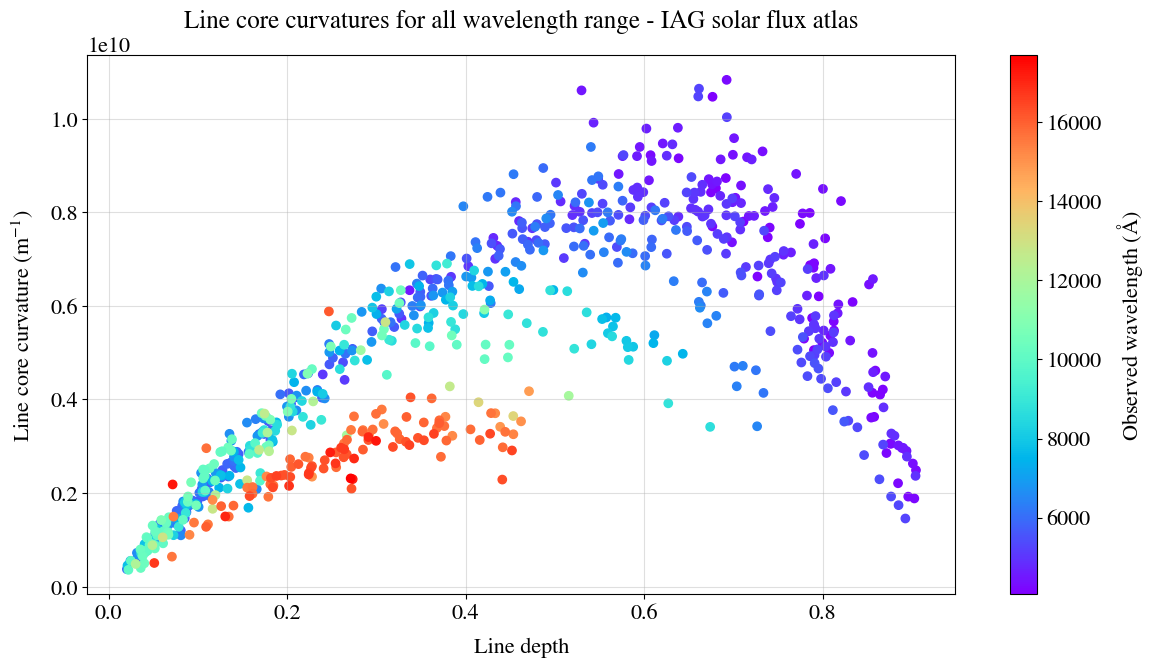

In [6]:
fig6, ax = plt.subplots(1,1,figsize=(14,7))

scatter = ax.scatter(ALL_data['Line Depth'],ALL_data['Core curvature'],c=ALL_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)

ax.set_title('Line core curvatures for all wavelength range - IAG solar flux atlas', pad=20)
ax.set_xlabel(r'Line depth',labelpad=10)
ax.set_ylabel(r'Line core curvature $(\text{m}^{-1})$',labelpad=10)
ax.grid(alpha=0.4)

# fig6.savefig('Curvature_ALL')

### Linear fit for shallow lines

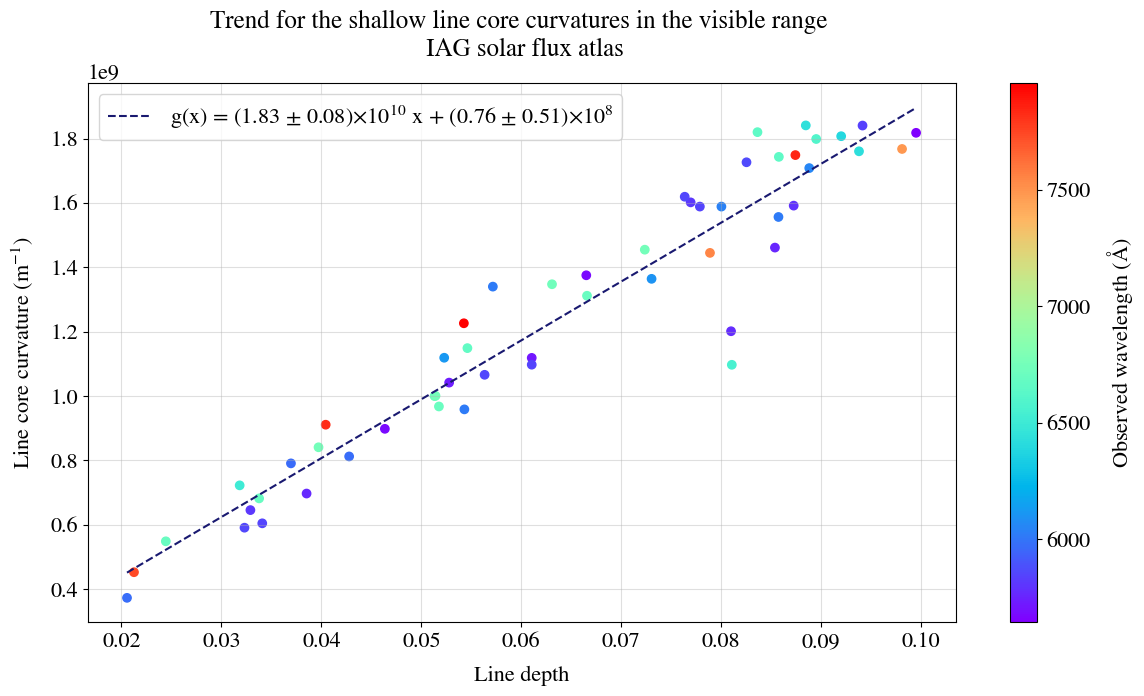

In [ ]:
#Select only the slope for small line depth
values_VIS_line = VIS_data[VIS_data['Line Depth'].between(0.0,0.1,inclusive='right')]

#Made a polynomial first order fit
param, cov = np.polyfit(values_VIS_line['Line Depth'],values_VIS_line['Core curvature'], 1,cov=True)
values_fit = np.linspace(min(values_VIS_line['Line Depth']), max(values_VIS_line['Line Depth']), len(values_VIS_line['Line Depth']))
fit = np.polyval(param,values_fit)
# Standard error
error = np.sqrt(np.diag(cov))
#Calcule the pearson coeffcient where R2=r2
r = values_VIS_line['Core curvature'].corr(pd.Series(fit, index=values_VIS_line.index))

#Plot for fixed the zero point of velocity
fig2, ax1 = plt.subplots(1,1,figsize=(14,7))

ax1.set_title('Trend for the shallow line core curvatures in the visible range \n IAG solar flux atlas', pad=20)

scatter = ax1.scatter(values_VIS_line['Line Depth'],values_VIS_line['Core curvature'],c=values_VIS_line["Observed wavelength"],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)

ax1.plot(values_fit,fit,linestyle='--',c='midnightblue',label=rf'g(x) = ({round(param[0]*1e-10,2)} $\pm$ {round(error[0]*1e-10,2)})$\times 10^{{10}}$ x + ({round(param[1]*1e-8,2)} $\pm$ {round(error[1]*1e-8,2)})$\times 10^{{8}}$')
# ax1.scatter([],[],c='white',label=rf'R$^2$ = {round(r**2,2)}')
ax1.set_ylabel(r'Line core curvature $(\text{m}^{-1})$',labelpad=10)
ax1.set_xlabel(r'Line depth',labelpad=10)
ax1.grid(alpha=0.4)
ax1.tick_params(axis='both')
ax1.legend()

# fig2.savefig('Curvature_Slope_VIS')

In [ ]:
#The theoretical velocity model
((300000)**2/(param[0])) - (0.86+0.90)

array([1.82914461e+10, 7.55219457e+07])

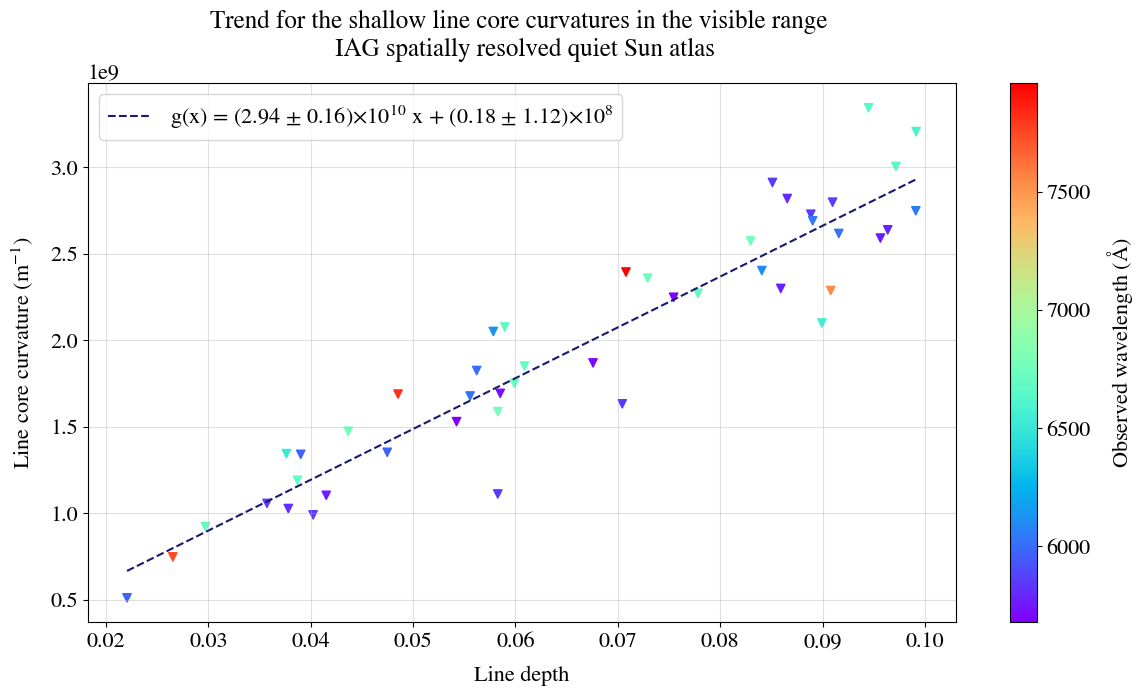

In [ ]:
#Select only the slope for small line depth
values_SPA_line = SPA_data[SPA_data['Line Depth'].between(0.0,0.1,inclusive='right')]

#Made a polynomial first order fit
param, cov = np.polyfit(values_SPA_line['Line Depth'],values_SPA_line['Core curvature'], 1,cov=True)
values_fit = np.linspace(min(values_SPA_line['Line Depth']), max(values_SPA_line['Line Depth']), len(values_SPA_line['Line Depth']))
fit = np.polyval(param,values_fit)
# Standard error
error = np.sqrt(np.diag(cov))
#Calcule the pearson coeffcient where R2=r2
r = values_SPA_line['Core curvature'].corr(pd.Series(fit, index=values_SPA_line.index))

#Plot for fixed the zero point of velocity
fig4, ax1 = plt.subplots(1,1,figsize=(14,7))

ax1.set_title('Trend for the shallow line core curvatures in the visible range \n IAG spatially resolved quiet Sun atlas', pad=20)

scatter = ax1.scatter(values_SPA_line['Line Depth'],values_SPA_line['Core curvature'],c=values_SPA_line["Observed wavelength"],cmap='rainbow',lw=1,marker='v')
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)

ax1.plot(values_fit,fit,linestyle='--',c='midnightblue',label=rf'g(x) = ({round(param[0]*1e-10,2)} $\pm$ {round(error[0]*1e-10,2)})$\times 10^{{10}}$ x + ({round(param[1]*1e-8,2)} $\pm$ {round(error[1]*1e-8,2)})$\times 10^{{8}}$')
# ax1.scatter([],[],c='white',label=rf'R$^2$ = {round(r**2,3)}')
ax1.set_ylabel(r'Line core curvature $(\text{m}^{-1})$',labelpad=10)
ax1.set_xlabel(r'Line depth',labelpad=10)
ax1.grid(alpha=0.4)
ax1.tick_params(axis='both')
ax1.legend()

# fig4.savefig('Curvature_Slope_SPA')

In [ ]:
#The theoretical velocity model
((300000)**2/(param[0])) - (0.86)

2.2012244897959183